<a href="https://colab.research.google.com/github/wagiham/Book_Review_Machine_Learning_Model/blob/main/Book_Review_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project executes the following tasks:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

## Part 1: Load the Data Set


In [ ]:

bookReviewsDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(bookReviewsDataSet_filename)
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Exploratory Data Analysis



In [ ]:
X = df["Review"]
y = df["Positive Review"]

(1973,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)


In [ ]:
# 1. Create a TfidfVectorizer object and save it to the variable 'tfidf_vectorizer'
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transform the training data and save the data to
# variable 'X_train_tfidf'
X_train_tfidf = tfidf_vectorizer.transform(X_train)


# 4. Using the fitted vectorizer, transform the test data and save the data to
# variable 'X_test_tfidf'
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
print(X_test_tfidf)

  (0, 17309)	0.06028743272754012
  (0, 17089)	0.0892691494634941
  (0, 17014)	0.035941301331842215
  (0, 16971)	0.03477274619138932
  (0, 16922)	0.1140561164843457
  (0, 16883)	0.09477966855228216
  (0, 16843)	0.0281967561879993
  (0, 16544)	0.051990510293616315
  (0, 16181)	0.12058036759076858
  (0, 16131)	0.12058036759076858
  (0, 16074)	0.07012781027231944
  (0, 15783)	0.047908936812493585
  (0, 15744)	0.07378361844070709
  (0, 15714)	0.04083722935957416
  (0, 15632)	0.13161447260622863
  (0, 15616)	0.049870239428908364
  (0, 15604)	0.07803545910542738
  (0, 15568)	0.048174906224872256
  (0, 15563)	0.04656022874406431
  (0, 15557)	0.043680528087570884
  (0, 15549)	0.03445058789319525
  (0, 15546)	0.023697386877388812
  (0, 15337)	0.056246187337193235
  (0, 14870)	0.10942708665672643
  (0, 14850)	0.053786884853802334
  :	:
  (650, 1021)	0.02679353610356293
  (650, 919)	0.13036518885860382
  (650, 895)	0.039801168111753625
  (650, 778)	0.01998438447312484
  (650, 659)	0.05962522543123

In [ ]:
# 1. Create the LogisticRegression model object
model = LogisticRegression(max_iter=200)


# 2. Fit the model to the transformed training data
model.fit(X_train_tfidf, y_train)


# 3. Use the predict_proba() method to make predictions on the test data
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]
class_label_predictions = model.predict(X_test_tfidf)

# 4. Compute the area under the ROC curve for the test data.
#auc = roc_auc_score(y_test, probability_predictions)
#print('AUC on the test data: {:.4f}'.format(auc))
print(class_label_predictions)
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))


# 5. Compute the size of the resulting feature space
len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

[ True  True False False  True False False False  True  True  True False
  True  True  True  True False  True  True False False  True False  True
 False False  True  True False False False False False  True  True False
  True False  True  True  True  True False  True False False False  True
  True False False False False False False False  True  True False False
  True  True False  True False  True  True False False False  True False
 False  True  True False False  True False False  True  True False  True
 False  True False False False False False False False  True False False
 False  True  True False  True  True  True False  True  True  True  True
  True  True  True False  True  True False False  True  True False  True
 False  True False False  True False False  True  True  True  True False
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True False False  True False  True  True False  True
 False  True  True False  True  True False False Fa

In [ ]:
print (model.coef_)
print (len(model.coef_[0]))

[[-0.05375529 -0.12880118  0.04215157 ...  0.08351275 -0.04106144
   0.02086352]]
17365


In [ ]:
from sklearn.pipeline import Pipeline

print('Begin ML pipeline...')

# 1. Define the list of steps:
s = [
        ("vectorizer", TfidfVectorizer(ngram_range=(1,2), min_df=10)),
        ("model", LogisticRegression(max_iter=200))
    ]

# 2. Define the pipeline:
model_pipeline = Pipeline(steps=s)

# We can use the pipeline the way would would use a model object
# when fitting the model on the training data and testing on the test data:

# 3. Fit the pipeline to the training data
model_pipeline.fit(X_train, y_train)

# 4. Make predictions on the test data
# Save the second column to the variable 'probability_predictions'
probability_predictions = model_pipeline.predict_proba(X_test)[:, 1]

print('End pipeline')

Begin ML pipeline...
End pipeline


In [ ]:
# Evaluate the performance by computing the AUC
print(probability_predictions)
#auc_score = auc(y_test, probability_predictions)
#fpr, tpr, thresholds = sklearn.metrics.roc_curve(y, pred, pos_label=2)
auc_score = roc_auc_score(y_test, probability_predictions)


print('AUC on the test data: {:.4f}'.format(auc_score))

[0.55845971 0.63017217 0.46727637 0.46577486 0.66113708 0.43587718
 0.40253233 0.29099764 0.72277909 0.56066767 0.58434248 0.49437267
 0.59550052 0.63028549 0.48367009 0.56113853 0.27589076 0.49008695
 0.55760389 0.43597842 0.4096893  0.61249798 0.35718516 0.68233904
 0.39431672 0.27441248 0.59842127 0.58744192 0.2922814  0.28189664
 0.30602304 0.38397224 0.46701161 0.5125365  0.56969184 0.33443398
 0.5793335  0.28456725 0.74329445 0.69826182 0.52875955 0.78333521
 0.34222432 0.59677295 0.31285942 0.29262753 0.38180688 0.83759983
 0.67581555 0.5169727  0.37963373 0.33338927 0.33493958 0.35568416
 0.15866199 0.28545092 0.62669598 0.58242402 0.35926231 0.34085014
 0.73703566 0.75311702 0.33892721 0.5888426  0.27485842 0.70186833
 0.57599815 0.2961402  0.26008922 0.50284151 0.39433515 0.38218793
 0.3981519  0.50853984 0.60573516 0.34303889 0.30291002 0.71457027
 0.32086871 0.24499757 0.53410795 0.66186457 0.45331916 0.81654234
 0.40644735 0.67048772 0.29164239 0.30248031 0.43544327 0.2318

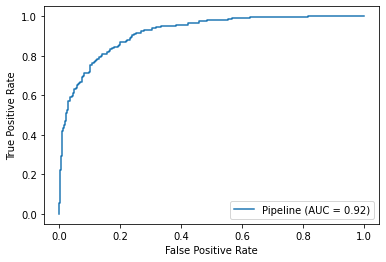

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_pipeline, X_test, y_test)

In [ ]:
#Perform a GridSearchCV on the Pipeline to Find the Best Hyperparameters

model_pipeline.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'model', 'vectorizer__analyzer', 'vectorizer__binary', 'vectorizer__decode_error', 'vectorizer__dtype', 'vectorizer__encoding', 'vectorizer__input', 'vectorizer__lowercase', 'vectorizer__max_df', 'vectorizer__max_features', 'vectorizer__min_df', 'vectorizer__ngram_range', 'vectorizer__norm', 'vectorizer__preprocessor', 'vectorizer__smooth_idf', 'vectorizer__stop_words', 'vectorizer__strip_accents', 'vectorizer__sublinear_tf', 'vectorizer__token_pattern', 'vectorizer__tokenizer', 'vectorizer__use_idf', 'vectorizer__vocabulary', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [ ]:
param_grid = {
    'model__C': [0.1, 1, 10],
    'vectorizer__ngram_range': [(1, 1), (1, 2)]
}


param_grid

{'model__C': [0.1, 1, 10], 'vectorizer__ngram_range': [(1, 1), (1, 2)]}

In [ ]:
print('Running Grid Search...')

# 1. Run a Grid Search with 3-fold cross-validation and assign the output to the
# object 'grid_LR'.

grid = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2)


# 2. Fit the model (grid_LR) on the training data and assign the fitted model to the
# variable 'grid_search_LR'

grid_search_LR = grid.fit(X_train, y_train)


print('Done')

Running Grid Search...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] model__C=0.1, vectorizer__ngram_range=(1, 1) ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 1), total=   0.3s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 1) ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 1), total=   0.3s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 1) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 1), total=   0.3s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 2) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 2), total=   0.8s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 2) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 2), total=   0.8s
[CV] model__C=0.1, vectorizer__ngram_range=(1, 2) ....................
[CV] ..... model__C=0.1, vectorizer__ngram_range=(1, 2), total=   0.7s
[CV] model__C=1, vectorizer__ngram_range=(1, 1) ......................
[CV] ....... model__C=1, vectorizer__ngram_range=(1, 1), total=   0.3s
[CV] model__C=1, vectorizer__ngram_range=(1, 1) ......................
[CV] ....... model__C=1, vectorizer__ngram_range=(1, 1), total=   0.3s
[CV] model__C=1, vectorizer__ngram_range=(1, 1) ......................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   10.3s finished


Done


In [ ]:
grid_search_LR.best_estimator_
#best_estimator = grid.best_estimator_

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=10, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_

In [ ]:
best_hyperparameters = grid_search_LR.best_params_
print(best_hyperparameters)

{'model__C': 10, 'vectorizer__ngram_range': (1, 2)}


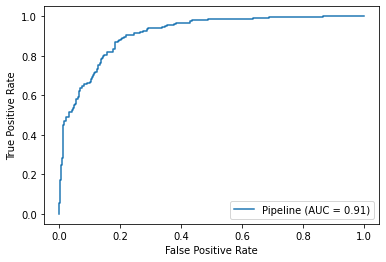

In [ ]:
plot_roc_curve(grid.best_estimator_, X_test, y_test)
plt.show()

## Part 3:  Project Plan


In [ ]:

For the model, I chose to use Logistic Regression because we are using categorical values and then to use TD-IDF to transform the words into binary values. To improve the model, I used grid search to create the best hyparameters. The accuracy score of an 0.81 means that the model is doing a good job at predicting whether the reviews are positive or not by labelling them as true or false. The AUC is 0.91 meaning that  that the model is doing a good job at differentiating between positive and negative classes.